In [61]:
#Linear Regression is a Supervised Learning method, where the predicted output will be continuous in nature. 
#For example, things like price prediction, marks prediction, and so on.

#Linear Regression is a fundamental statistical and machine learning technique used for modeling the relationship between 
#a dependent variable (also known as the target or response variable) and one or more independent variables (predictors or features).

#It aims to establish a linear equation that best represents the association between these variables, 
#allowing us to make predictions and draw insights from the data.

#The primary goal of linear regression is to find the "best-fit" line (or hyperplane in higher dimensions) 
#that minimizes the difference between the predicted values and the actual observed values.

#This best-fit line is defined by a linear equation of the form:
#Y = b0 ​+ b1​X1 ​+ b2​X2 ​+...+ bn​Xn​
#In this equation:
#Y represents the dependent variable we want to predict.
#X1,X2,...,Xn are the independent variables or features.
#b0 is the intercept (the value of Y when all X values are zero).
#b1,b2,...,bn are the coefficients that determine the relationship between each independent variable and the dependent variable.
#Linear regression assumes that there is a linear relationship between the predictors and the target variable.

#The goal of the model is to estimate the coefficients (b0,b1,...,bn) that minimize the sum of the squared differences 
#between the predicted values and the actual values in the training data. This process is often referred to as "fitting the model."

In [62]:
#Evaluation Metrics
#The evaluation metrics for a Linear Regression model are:

#Coefficient of Determination or R-Squared (R2)
#Root Mean Squared Error (RSME)
#Let's see what each of these are.

#R-Squared
#R-Squared describes the amount of variation that is captured by the developed model. 
#always ranges between 0 and 1. The higher the value of R-squared, the better the model fits with the data.

#Root Mean Squared Error
#RMSE measures the average magnitude of the errors or residuals between the predicted values generated by a model 
#and the actual observed values in a dataset. It always ranges between 0 and positive infinity. 
#Lower RMSE values indicate better predictive performance.

In [63]:
# Importing libraries
# pandas for datatframe, numpy for the maths, matplotlib for visualisatioon of results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Import the library for predictive data analysis, used in machine learning, for create test data and 
# training data and to perfom linear regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold

In [64]:
# Import the data in a dataframe and make a copy of it
df = pd.read_csv('car data.csv')
df_1 = df.copy(deep=True)

Exploratory Data Analysis (EDA)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
# Check if there are null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [67]:
# Identifying categorical and numerical features
categorical_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
print('Categorical features:', categorical_columns)
print('Numerical continues features:', numerical_columns)

Categorical features: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
Numerical continues features: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [68]:
# Identifying number of categories (unique values) in the categorical features ahead of encoding#
cardinality_car_name = df['Car_Name'].nunique()
cardinality_fuel_type = df['Fuel_Type'].nunique()
cardinality_seller_type = df['Seller_Type'].nunique()
cardinality_transmission = df['Transmission'].nunique()

print('Cardinality of car name: ', cardinality_car_name)
print('Cardinality of fuel type: ', cardinality_fuel_type)
print('Cardinality of seller type: ', cardinality_seller_type)
print('Cardinality of transmission: ', cardinality_transmission)

# Fuel type has 3 categories : petrol, diesel and cng while seller type and transmission only 2 so they will generate 2 columns
# that can be transform in only one with false true value
# the name of the car has too many categories to be relevant here but I will create a model considerign that feature and one not including
# to study the impact on the model perfromances

Cardinality of car name:  98
Cardinality of fuel type:  3
Cardinality of seller type:  2
Cardinality of transmission:  2


In [69]:
df.sample(20)
# I used this to find the 3rd category for the fule type


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
108,Royal Enfield Thunder 350,2016,1.20,1.50,18000,Petrol,Individual,Manual,0
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,Petrol,Individual,Manual,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
222,i20,2014,6.00,7.60,77632,Diesel,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
141,Bajaj Avenger 150 street,2016,0.60,0.80,20000,Petrol,Individual,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
128,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0
138,Honda CB Hornet 160R,2016,0.60,0.87,15000,Petrol,Individual,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0


In [70]:
# One-Hot Encoding
df = pd.get_dummies(df, columns = ['Fuel_Type']) 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,False,False,True
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,False,True,False
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,False,False,True
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,False,False,True
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,False,True,False


In [71]:
# Binary encoding
# For Seller_type and transmission ai can use binary encoding not to increase dimension unnecessaraly 

df = pd.get_dummies(df, columns = ['Transmission', 'Seller_Type'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,False,True,True,False
1,sx4,2013,4.75,9.54,43000,0,False,True,False,False,True,True,False
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,False,True,True,False
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,False,True,True,False
4,swift,2014,4.60,6.87,42450,0,False,True,False,False,True,True,False


In [72]:
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
print('Numeriacl features:', numerical_columns)

Numeriacl features: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Seller_Type_Dealer', 'Seller_Type_Individual']


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Fuel_Type_CNG           301 non-null    bool   
 7   Fuel_Type_Diesel        301 non-null    bool   
 8   Fuel_Type_Petrol        301 non-null    bool   
 9   Transmission_Automatic  301 non-null    bool   
 10  Transmission_Manual     301 non-null    bool   
 11  Seller_Type_Dealer      301 non-null    bool   
 12  Seller_Type_Individual  301 non-null    bool   
dtypes: bool(7), float64(2), int64(3), object(1)
memory usage: 16.3+ KB


In [74]:
df.drop('Car_Name', axis=1, inplace=True)

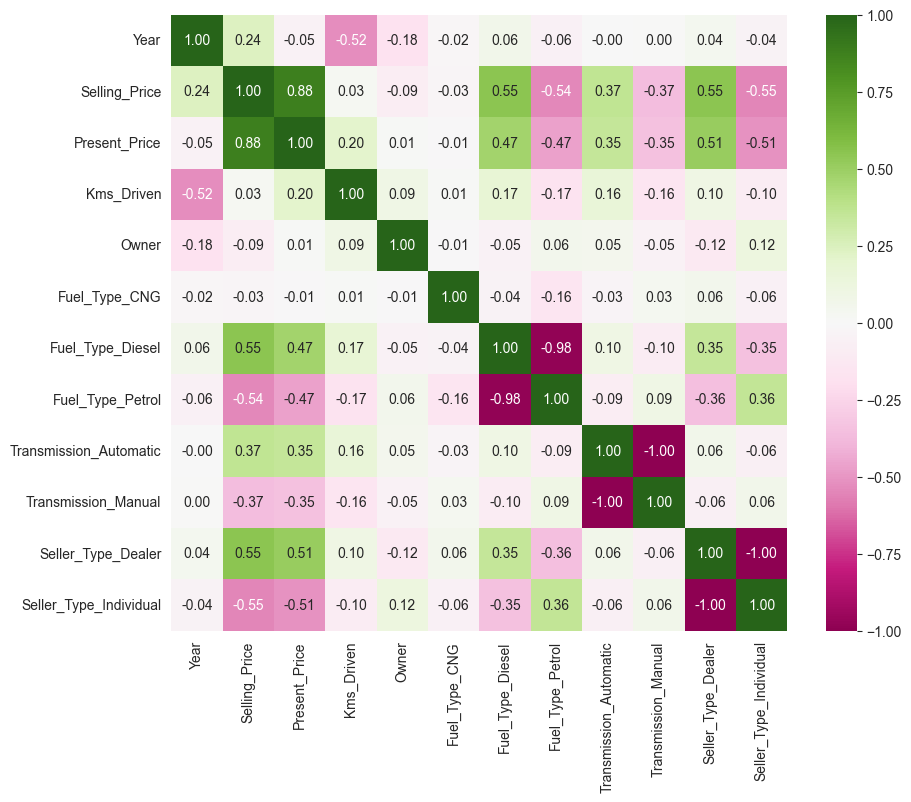

In [81]:
# Correlation Analysis
# Checking correlation between the data using heatmap in seaborn

fig, ax = plt.subplots(figsize=(10,8))
c=df.corr()
ax = sns.heatmap(c, vmax=1, annot=True, square=True, fmt=".2f", cmap='PiYG')

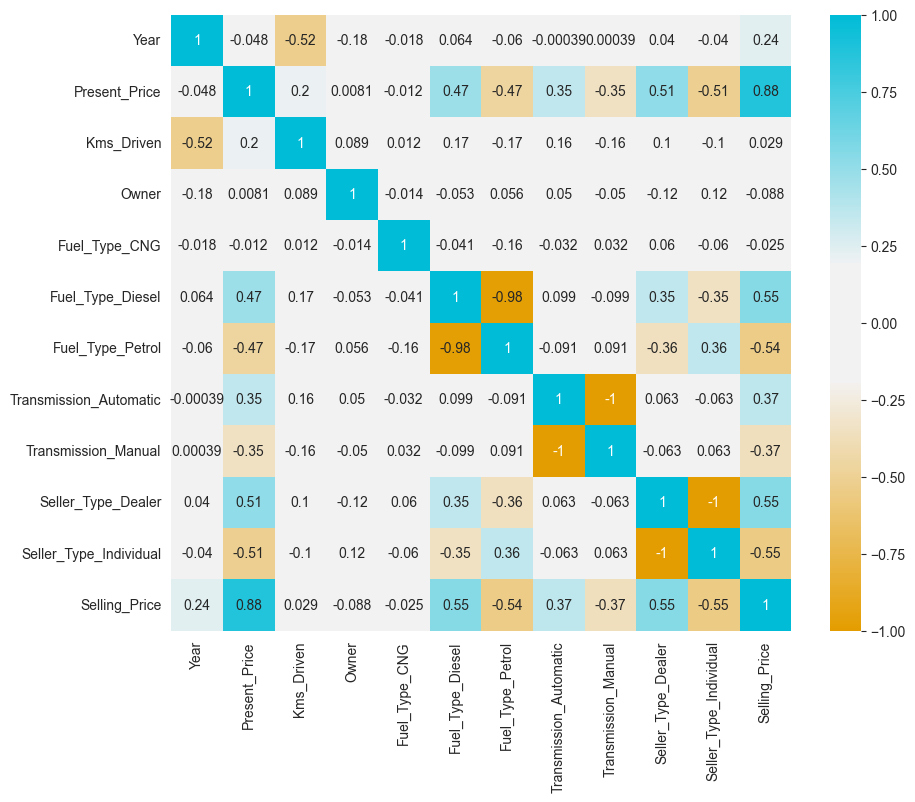

In [80]:
# Correlation Analysis: trying to isolate the dependable variable to make the plot easily readable

dependable= 'Selling_Price'
cmap = sns.diverging_palette(50, 214, s=100, l=70, sep=50, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(pd.concat([df.drop(dependable,axis=1), df[dependable]],axis=1).corr(), annot=True, cmap=cmap)

In [ ]:
# Final decision on which features to use:
# 'Year','Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Transmission_Automatic', 'Seller_Type_Dealer'

In [22]:
# Defyning the data
# Selecting the subset of predictors (.values return numpy.ndarray) and separating the target
X = df[['Year','Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Transmission_Automatic', 'Seller_Type_Dealer']].values
y = df['Selling_Price'].values
print(X.shape)
print(y.shape)

# Checking that X and y are indeed nparray and I can feed them to the Linear Regression
print(type(y))
print(type(X))

(301, 8)
(301,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 1/3, random_state=1)

In [26]:
# Normalisation of the data
# Standard scaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [30]:
 # Train the model
 # Fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make prediction

y_pred = lr.predict(X_test)

In [32]:
# Checking results

result = {'Actual Selling Price': y_test, 'Predicted Selling price': y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual Selling Price,Predicted Selling price
0,7.40,7.754461
1,4.00,2.912637
2,0.50,-0.581110
3,3.15,4.154704
4,1.25,0.515088
...,...,...
96,0.40,-0.159063
97,1.25,1.568805
98,0.42,0.516585
99,0.55,0.881417


In [33]:
# Evaluating the models: creating a function to evaluate the model

def model_evaluation(lr, X_test, y_test, model_name):
    y_pred = lr.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    #Mean Absolute Error: average absolute difference between the predicted and 
    #actual values. Lower MAE values indicate better model performance.
    MSE = metrics.mean_squared_error(y_test, y_pred)
    #Mean Squared Error: average squared difference between the predicted and actual values. 
    # Lower MSE values indicate better model performance.
    RMSE = np.sqrt(MSE)
    # Root Mean Squared Error: square root of the MSE and provides an interpretable measure 
    # of the average error in the same units as the target variable.
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [36]:
# Evaluating the multiple linear regression and creating a data frame with the results
lr_evaluation= model_evaluation(lr, X_test, y_test, 'Multiple Linear Regression')

result_lr_evaluation = pd.DataFrame(lr_evaluation).round(4)
result_lr_evaluation

,Multiple Linear Regression
MAE,1.0537
MSE,2.5929
RMSE,1.6102
R2-Score,0.8664


In [ ]:
# To do:
# Improving the model by reviewing data quality and using lasso and ridge